Heart Disease Data Set

Data Set Information:

This database contains 14 attributes . In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).



Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)



## Import Libraries

In [1]:
# import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')# importing warning library to avoid any warning message#

In [2]:
#Reading the data fron CSV file using pandas and creating Pandas dataframe.
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
hd = pd.read_table("heartdisease_data.csv", sep=',', header=None, names=columns)

In [3]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [4]:
#checking first five rows
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [5]:
#checking the dimensions
hd.shape

(200, 14)

In [6]:
#checking the column
hd.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [7]:
#checking for null values
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

observation:
  There are no values but there are '?' present in or dataset which is treated as null value. 

In [8]:
#replacing the question mark with Nan
hd=hd.replace('?',np.nan)
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
#checking for null values again
hd.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

now it tells that null values are present

observation:

: There are 56,7,7,3,53,56,102,198,166 null values are present in trestbps ,chol,fbs,thalach,exang,oldspeak,slope ,thal columns respectively 

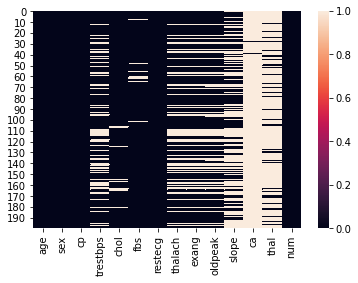

In [10]:
#checking null values using heatmap
sns.heatmap(hd.isnull())

In [11]:
#checking the information of dataset
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  144 non-null    object
 4   chol      193 non-null    object
 5   fbs       193 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   147 non-null    object
 8   exang     147 non-null    object
 9   oldpeak   144 non-null    object
 10  slope     98 non-null     object
 11  ca        2 non-null      object
 12  thal      34 non-null     object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


observation: 

The summary shows that 9 variables contain missing values

In [12]:
#imputing the missing value with mode
for col in ['trestbps', 'chol', 'fbs', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal',]:
    hd[col].fillna(hd[col].mode()[0],inplace=True)

In [13]:
# now again checking null values
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

now no null values are present.we can see via visualisation.

In [14]:
#Putting the data into Pandas dataframe
hd_new=pd.DataFrame(hd)
hd_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,0,7,2
1,44,1,4,130,209,0,1,127,0,0,2,0,7,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,7,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,7,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,7,0


In [15]:
hd_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [16]:
#stastical summary
hd_new.describe()

,age,sex,cp,restecg,num
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


observation:
    
    1. minimum age is 35 and maximum age is 77 years .
    2. minimum cp is 1 and maximum is 4
    3. diffrence between 75% and max  is sslighthly higher therefore otliers are present .

## Exploratory  Data Analysis

### Univariate analysis

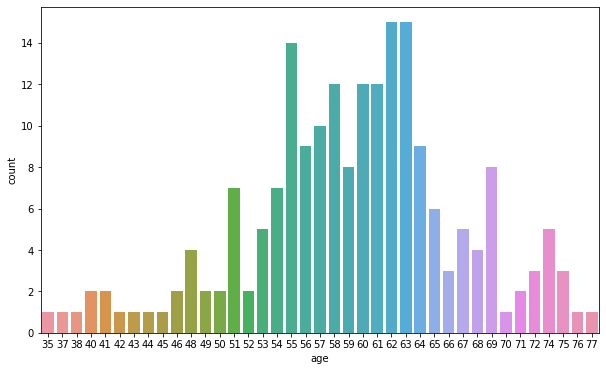

In [17]:
#plotting countplot for age
plt.figure(figsize=(10,6))
sns.countplot(hd_new['age'])
plt.show()

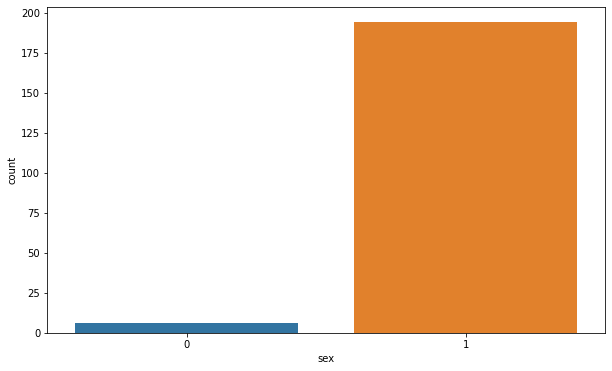

In [18]:
#plotting countplot for sex
plt.figure(figsize=(10,6))
sns.countplot(hd_new['sex'])
plt.show()

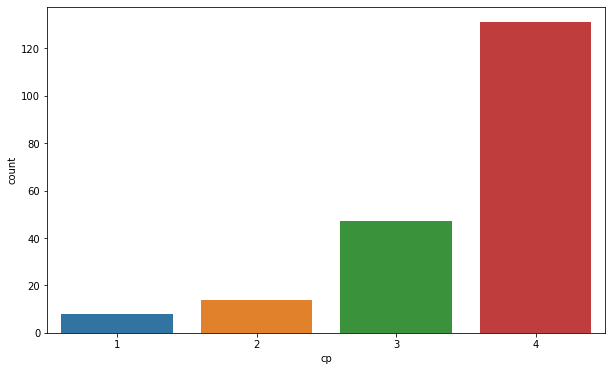

In [19]:
#plotting countplot for cp
plt.figure(figsize=(10,6))
sns.countplot(hd_new['cp'])
plt.show()

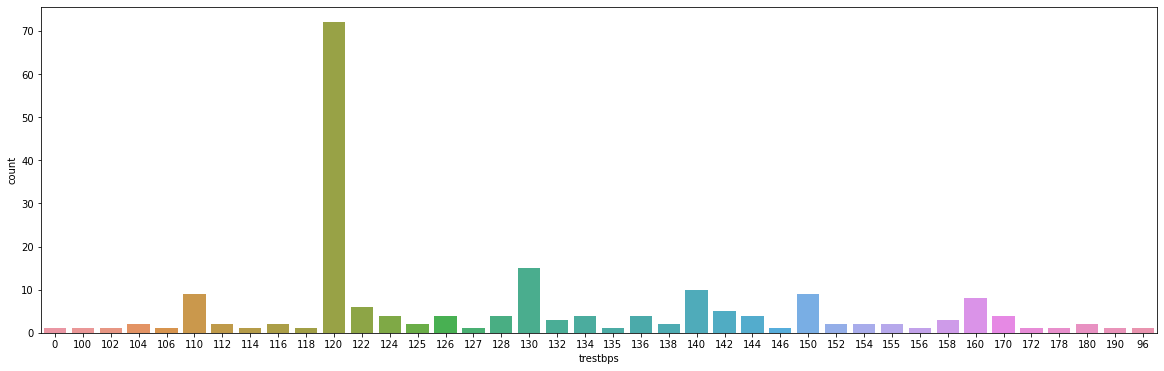

In [20]:
#plotting countplot for trestbps
plt.figure(figsize=(20,6))
sns.countplot(hd_new['trestbps'])
plt.show()

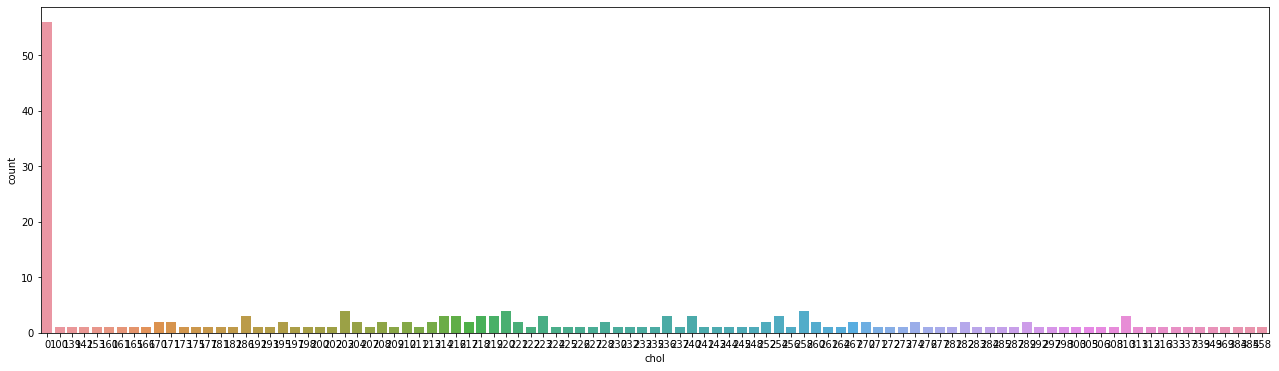

In [21]:
#plotting countplot for chol
plt.figure(figsize=(22,6))
sns.countplot(hd_new['chol'])
plt.show()

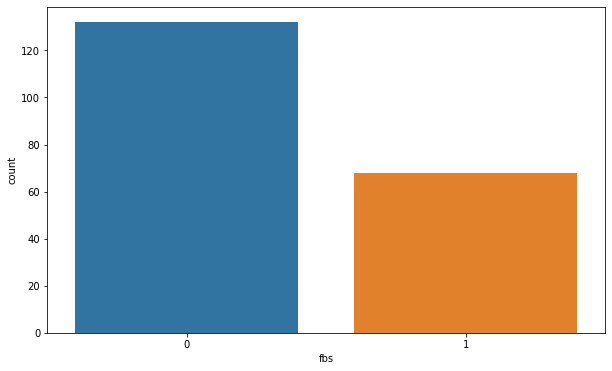

In [22]:
#plotting countplot for fbs
plt.figure(figsize=(10,6))
sns.countplot(hd_new['fbs'])
plt.show()

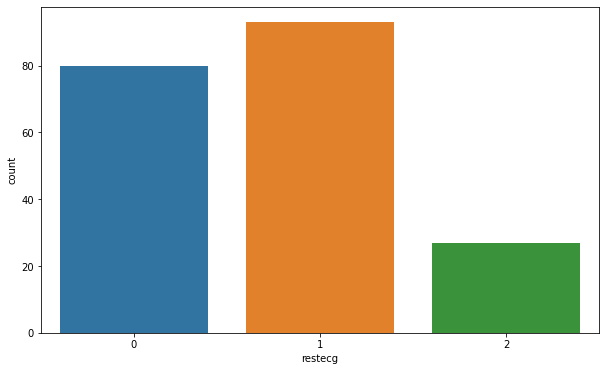

In [23]:
#plotting countplot for restecg
plt.figure(figsize=(10,6))
sns.countplot(hd_new['restecg'])
plt.show()

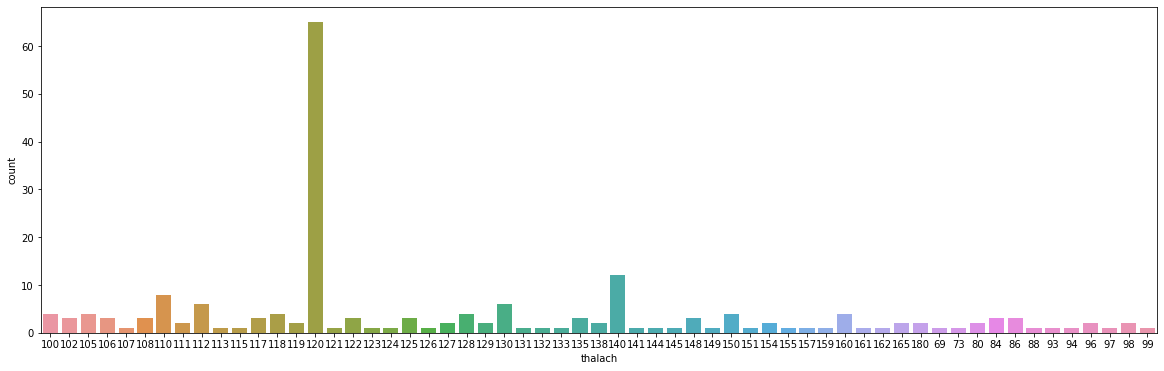

In [24]:
#plotting countplot for thalach
plt.figure(figsize=(20,6))
sns.countplot(hd_new['thalach'])
plt.show()

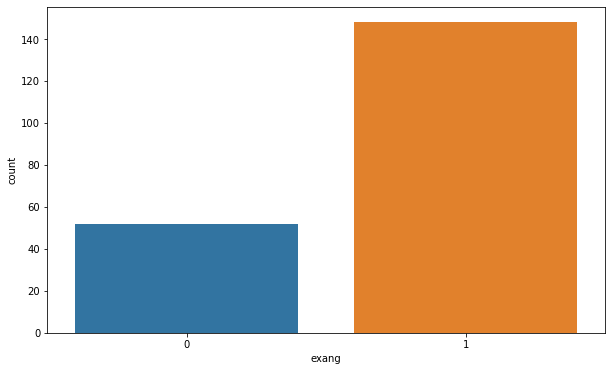

In [25]:
#plotting countplot for Exang
plt.figure(figsize=(10,6))
sns.countplot(hd_new['exang'])
plt.show()

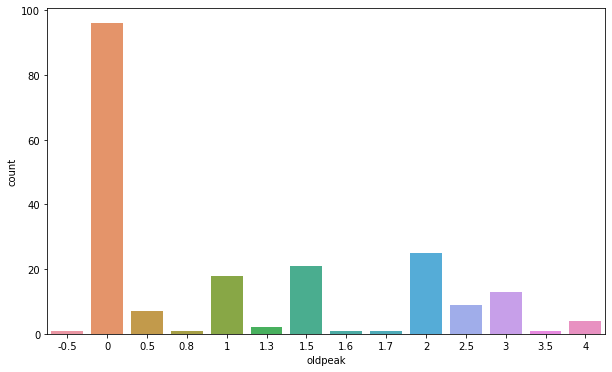

In [26]:
#plotting countplot for Oldpeak
plt.figure(figsize=(10,6))
sns.countplot(hd_new['oldpeak'])
plt.show()

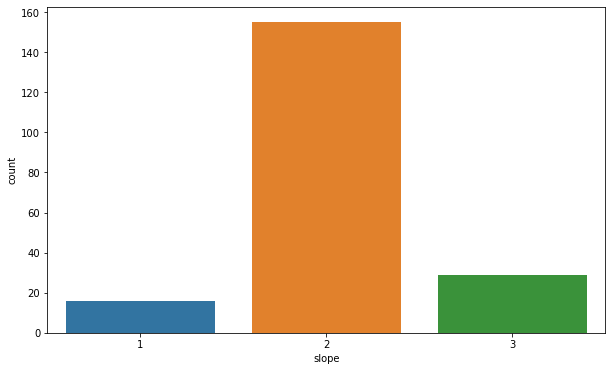

In [27]:
#plotting countplot for slope
plt.figure(figsize=(10,6))
sns.countplot(hd_new['slope'])
plt.show()

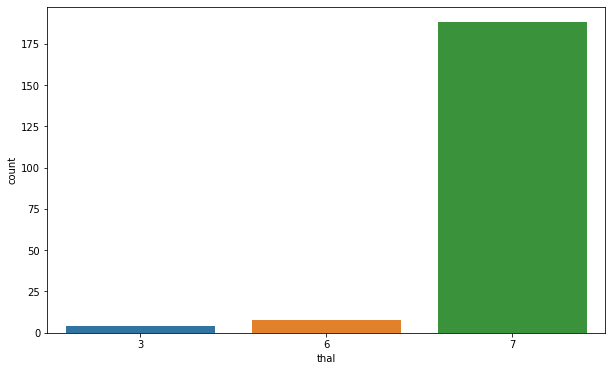

In [28]:
#plotting countplot for thal
plt.figure(figsize=(10,6))
sns.countplot(hd_new['thal'])
plt.show()

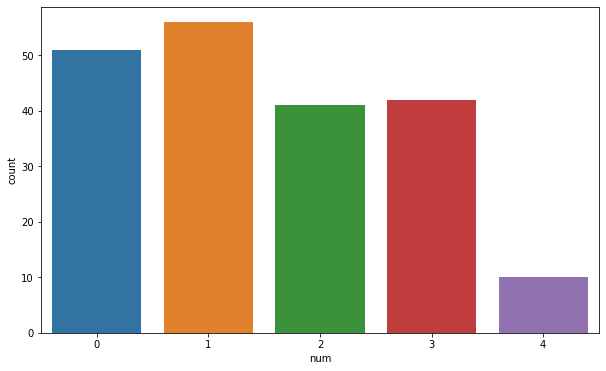

In [29]:
#plotting countplot for num
plt.figure(figsize=(10,6))
sns.countplot(hd_new['num'])
plt.show()

In [30]:
hd_new.drop('ca',axis=1,inplace=True)

### Biverate Analysis

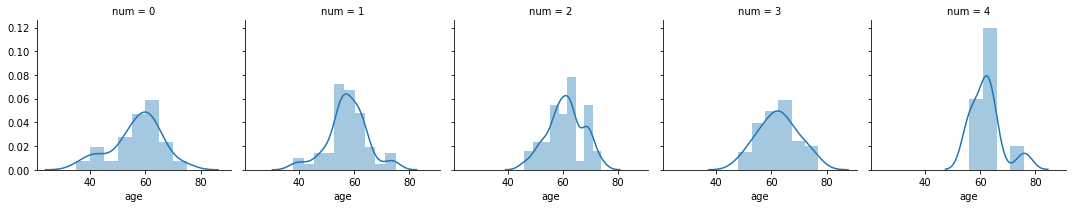

In [31]:
#exoploring age vs num via facegrid
facet=sns.FacetGrid(hd_new,col='num')
facet.map(sns.distplot,"age")
plt.show()

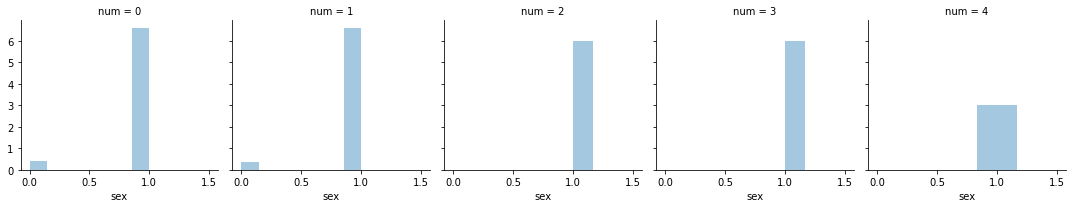

In [32]:
#exoploring Sex vs num via facegrid
facet=sns.FacetGrid(hd_new,col='num')
facet.map(sns.distplot,"sex")
plt.show()

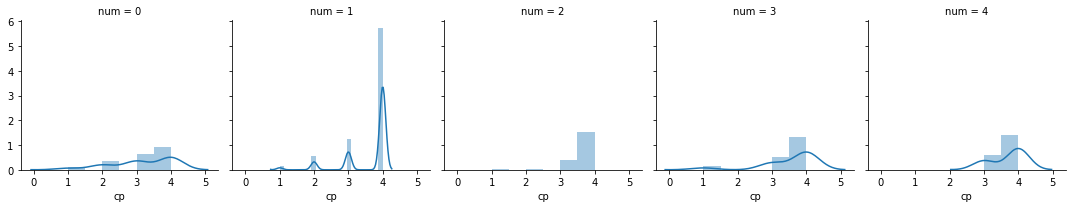

In [33]:
#exoploring cp vs num via facegrid
facet=sns.FacetGrid(hd_new,col='num')
facet.map(sns.distplot,"cp")
plt.show()

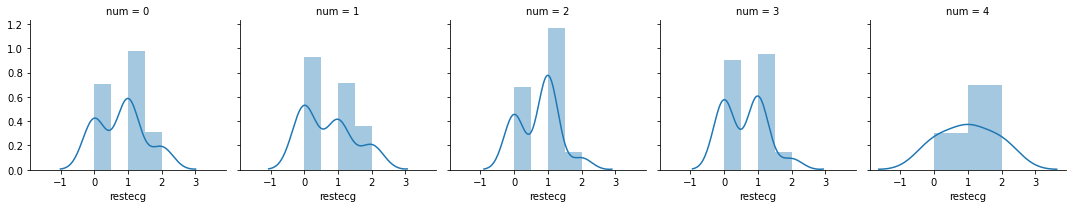

In [34]:
#exoploring restecg  vs num via facegrid
facet=sns.FacetGrid(hd_new,col='num')
facet.map(sns.distplot,"restecg")
plt.show()

### multivariate Analysis

In [35]:
hdcor=hd.corr()
hdcor

,age,sex,cp,restecg,num
age,1.000000,0.034230,-0.038280,0.002400,0.287289
sex,0.034230,1.000000,0.038036,0.060621,0.147470
cp,-0.038280,0.038036,1.000000,0.034790,0.168210
restecg,0.002400,0.060621,0.034790,1.000000,-0.032800
num,0.287289,0.147470,0.168210,-0.032800,1.000000


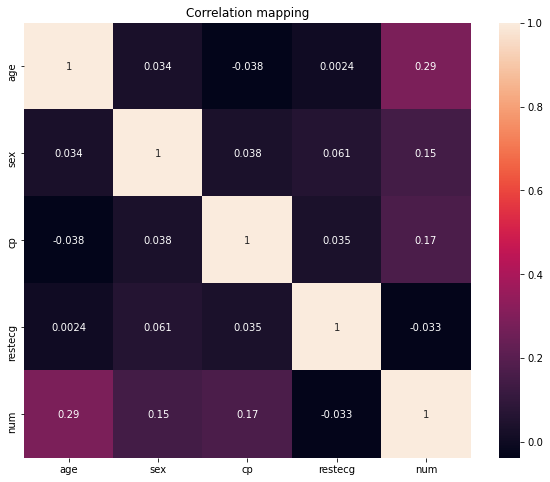

In [36]:
#checking correlation using heatmap
plt.figure(figsize = (10,8))
sns.heatmap(hd.corr(), annot = True)
plt.title('Correlation mapping')
plt.show()

observation:

1.restecg is neatively correlated with num.  


2.cp,age and sex are positively correlated with num

## checking skewness

In [37]:
hd_new.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -0.773003
chol       -0.469975
fbs         0.680636
restecg     0.391463
thalach     0.265689
exang      -1.102593
oldpeak     0.823429
slope       0.210521
thal       -5.920627
num         0.297393
dtype: float64

## Encoding

In [38]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in hd_new.columns:
    if hd_new[column].dtype==np.number:
        continue
    hd_new[column]=le.fit_transform(hd_new[column])

In [39]:
hd_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,25,1,3,23,62,0,1,8,1,11,1,2,2
1,7,1,3,17,28,0,1,21,0,1,1,2,0
2,22,1,3,18,35,0,1,30,1,6,2,2,2
3,17,1,3,24,45,0,1,35,1,10,0,2,1
4,28,1,2,5,31,1,2,58,1,5,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,16,0,3,15,91,1,1,38,0,1,1,2,1
196,24,1,0,10,2,0,1,14,1,1,1,2,0
197,17,1,3,11,40,1,1,0,0,1,1,1,2
198,20,1,3,10,97,1,2,14,1,1,1,2,0


## plotting outliers

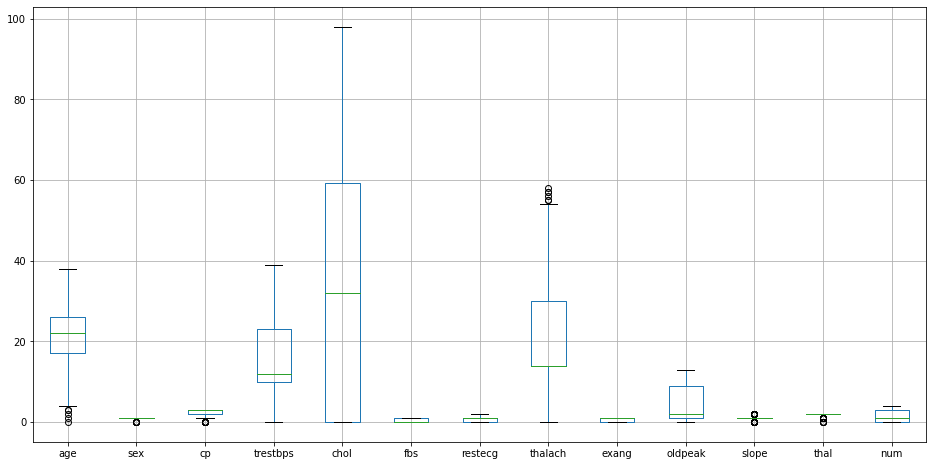

In [40]:
hd_new.boxplot(figsize=(16,8))

## Splitting data into training and testing sets

In [41]:
#splittting the taret varible
x = hd_new.drop('num', axis=1)               #Independent Variables
y= hd_new['num']                             #Dependent Variable

In [42]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [43]:
x

array([[ 0.46351952,  0.17586311,  0.71039812, ...,  1.36832953,
        -0.12898846,  0.25264558],
       [-1.84349523,  0.17586311,  0.71039812, ..., -0.95015806,
        -0.12898846,  0.25264558],
       [ 0.04562075,  0.17586311,  0.71039812, ...,  0.82990456,
         1.96468172,  0.25264558],
       ...,
       [-0.62561728,  0.17586311,  0.71039812, ..., -0.95015806,
        -0.12898846, -3.95807958],
       [-0.22689537,  0.17586311,  0.71039812, ..., -0.95015806,
        -0.12898846,  0.25264558],
       [ 0.32305693,  0.17586311, -1.79577196, ..., -0.95015806,
        -0.12898846,  0.25264558]])

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.46351952,  0.17586311,  0.71039812, ...,  1.36832953,
        -0.12898846,  0.25264558],
       [-1.84349523,  0.17586311,  0.71039812, ..., -0.95015806,
        -0.12898846,  0.25264558],
       [ 0.04562075,  0.17586311,  0.71039812, ...,  0.82990456,
         1.96468172,  0.25264558],
       ...,
       [-0.62561728,  0.17586311,  0.71039812, ..., -0.95015806,
        -0.12898846, -3.95807958],
       [-0.22689537,  0.17586311,  0.71039812, ..., -0.95015806,
        -0.12898846,  0.25264558],
       [ 0.32305693,  0.17586311, -1.79577196, ..., -0.95015806,
        -0.12898846,  0.25264558]])

## Building Model

In [45]:
x.shape

(200, 12)

In [46]:
y.shape

(200,)

In [47]:
#importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [48]:
# To find the best random state
best_r_state = 0
accu = 0
for i in range (30,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state = i)
    svc =SVC(kernel = 'poly')
    svc.fit(x_train,y_train)
    predsvc = svc.predict(x_test)
    svc.score(x_train,y_train)
    tempaccu = accuracy_score(y_test,predsvc)
    if tempaccu > accu:
        accu = tempaccu
        best_r_state = i
    
    
print(f'For accuracy is {accu * 100}% best random state is {best_r_state}')

For accuracy is 50.0% best random state is 58


In [49]:
# Check best model at arrived random state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=58)

## Logisic Regression

In [50]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(classification_report(y_test,predlr))

0.44
              precision    recall  f1-score   support

           0       0.47      0.75      0.58        12
           1       0.50      0.40      0.44        15
           2       0.40      0.40      0.40        10
           3       0.33      0.33      0.33         9
           4       0.00      0.00      0.00         4

    accuracy                           0.44        50
   macro avg       0.34      0.38      0.35        50
weighted avg       0.40      0.44      0.41        50



### Gaussian

In [51]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.1
[[ 0  0  0  0 12]
 [ 2  0  1  0 12]
 [ 0  0  1  0  9]
 [ 0  0  0  0  9]
 [ 0  0  0  0  4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        15
           2       0.50      0.10      0.17        10
           3       0.00      0.00      0.00         9
           4       0.09      1.00      0.16         4

    accuracy                           0.10        50
   macro avg       0.12      0.22      0.07        50
weighted avg       0.11      0.10      0.05        50



### SVC

In [52]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.42
[[10  1  0  1  0]
 [ 7  7  1  0  0]
 [ 2  3  3  2  0]
 [ 5  1  2  1  0]
 [ 0  2  0  2  0]]
              precision    recall  f1-score   support

           0       0.42      0.83      0.56        12
           1       0.50      0.47      0.48        15
           2       0.50      0.30      0.37        10
           3       0.17      0.11      0.13         9
           4       0.00      0.00      0.00         4

    accuracy                           0.42        50
   macro avg       0.32      0.34      0.31        50
weighted avg       0.38      0.42      0.38        50



### Decision Tree Classifier

In [53]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.36
[[6 2 3 1 0]
 [5 5 2 1 2]
 [5 2 2 1 0]
 [0 2 2 5 0]
 [0 3 0 1 0]]
              precision    recall  f1-score   support

           0       0.38      0.50      0.43        12
           1       0.36      0.33      0.34        15
           2       0.22      0.20      0.21        10
           3       0.56      0.56      0.56         9
           4       0.00      0.00      0.00         4

    accuracy                           0.36        50
   macro avg       0.30      0.32      0.31        50
weighted avg       0.34      0.36      0.35        50



### Knn Classifier

In [54]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.26
[[ 8  3  0  1  0]
 [10  3  0  2  0]
 [ 3  3  1  3  0]
 [ 4  1  3  1  0]
 [ 0  2  0  2  0]]
              precision    recall  f1-score   support

           0       0.32      0.67      0.43        12
           1       0.25      0.20      0.22        15
           2       0.25      0.10      0.14        10
           3       0.11      0.11      0.11         9
           4       0.00      0.00      0.00         4

    accuracy                           0.26        50
   macro avg       0.19      0.22      0.18        50
weighted avg       0.22      0.26      0.22        50



### Random Forest Classifier

In [55]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.36
[[8 2 0 2 0]
 [5 6 4 0 0]
 [3 3 2 2 0]
 [3 1 3 2 0]
 [0 1 0 3 0]]
              precision    recall  f1-score   support

           0       0.42      0.67      0.52        12
           1       0.46      0.40      0.43        15
           2       0.22      0.20      0.21        10
           3       0.22      0.22      0.22         9
           4       0.00      0.00      0.00         4

    accuracy                           0.36        50
   macro avg       0.27      0.30      0.28        50
weighted avg       0.32      0.36      0.33        50



## cross validation score for logistic regression


In [56]:
predlr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,predlr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:- ",j)
    print("Cross validation Score:- ",lsc*100)
    print("acuracy Score is:-",lss*100)
    print("\n")

At cv:-  2
Cross validation Score:-  37.5
acuracy Score is:- 44.0


At cv:-  3
Cross validation Score:-  39.009497964721845
acuracy Score is:- 44.0


At cv:-  4
Cross validation Score:-  38.0
acuracy Score is:- 44.0


At cv:-  5
Cross validation Score:-  34.0
acuracy Score is:- 44.0


At cv:-  6
Cross validation Score:-  34.99702911467617
acuracy Score is:- 44.0


At cv:-  7
Cross validation Score:-  36.98099929627023
acuracy Score is:- 44.0


At cv:-  8
Cross validation Score:-  35.0
acuracy Score is:- 44.0


At cv:-  9
Cross validation Score:-  37.06631532718489
acuracy Score is:- 44.0




In [57]:
lsscore_selected=cross_val_score(lr,x,y,cv=7).mean()
print("The CV Score is : ",lsscore_selected,"\nThe Accuracy Score is:",lss)

The CV Score is :  0.3698099929627023 
The Accuracy Score is: 0.44


## Saving the model

In [58]:
import pickle
filename='Heart_disease.pkl'
pickle.dump(lr,open(filename,'wb'))